In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

In [159]:
data = pd.read_feather("validation")
input_vars = pd.read_csv("input_parameters_validation.csv")

<AxesSubplot:>

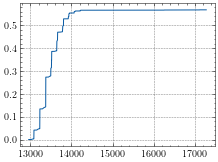

In [178]:
data.o5[data.o0==3].plot()

<ipython-input-196-c26ff9de551e>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)


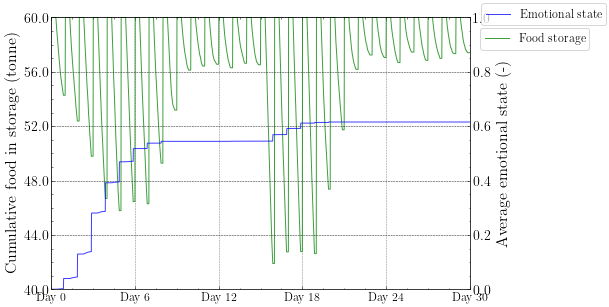

In [196]:
es = data.o5[data.o0==0]
food = data.o4[data.o0==0]

fig, ax = plt.subplots(1,1,figsize=(7.5,5))
sns.lineplot(data=food, color="g",label="Food storage",alpha=0.75)
ax2 = plt.twinx()
sns.lineplot(data=es, color="b", ax=ax2,label="Emotional state",alpha=0.75)

ax.set_ylabel("Cumulative food in storage (tonne)",fontsize=16)
ax.set_yticks(np.linspace(40e3,60e3,6))
ax.set_yticklabels(np.linspace(40,60,6),fontsize=14)
ax.set_ylim([40e3,60e3])

ax2.set_ylabel("Average emotional state (-)",fontsize=16)
ax2.set_ylim([0,1])
ax2.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)

plt.xticks(ticks = ticks_labels(6)[0],labels=ticks_labels(6)[1])
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.legend(loc="lower right",fontsize=12,bbox_to_anchor=(1.3, 0.86),framealpha=0.75)
ax2.legend(loc="lower right",fontsize=12,bbox_to_anchor=(1.34, 0.95),framealpha=0.75)
plt.xlim([0,4320]);
plt.savefig("/home/daan/Desktop/ES_FS15_Validation.png")

<ipython-input-194-1af8f91a5460>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)


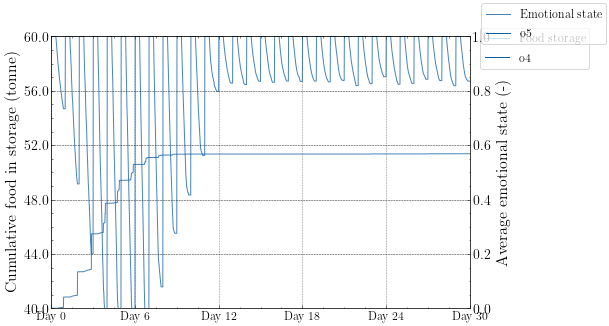

In [194]:
es = data.o5[data.o0==3].reset_index().drop(columns=["index"])
food = data.o4[data.o0==3].reset_index().drop(columns=["index"])


fig, ax = plt.subplots(1,1,figsize=(7.5,5))
sns.lineplot(data=food, color="g",label="Food storage",alpha=0.75)
ax2 = plt.twinx()
sns.lineplot(data=es, color="b", ax=ax2,label="Emotional state",alpha=0.75)

ax.set_ylabel("Cumulative food in storage (tonne)",fontsize=16)
ax.set_yticks(np.linspace(40e3,60e3,6))
ax.set_yticklabels(np.linspace(40,60,6),fontsize=14)
ax.set_ylim([40e3,60e3])

ax2.set_ylabel("Average emotional state (-)",fontsize=16)
ax2.set_ylim([0,1])
ax2.set_yticklabels(np.round(np.linspace(0,1,6),1),fontsize=14)

plt.xticks(ticks = ticks_labels(6)[0],labels=ticks_labels(6)[1])
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.legend(loc="lower right",fontsize=12,bbox_to_anchor=(1.3, 0.86),framealpha=0.75)
ax2.legend(loc="lower right",fontsize=12,bbox_to_anchor=(1.34, 0.95),framealpha=0.75)
plt.xlim([0,4320]);
plt.savefig("/home/daan/Desktop/ES_FS15_Validation.png")

In [195]:
es

,o5
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4315,0.568663
4316,0.568663
4317,0.568663
4318,0.568663


In [81]:
uc_endvals_dict = {}
for i in ["unsatisfied consumption","policy type","variation","fac5","food waste","distance"]:
    uc_endvals_dict[i] = list()


for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
    uc_endvals_dict["fac5"].append( np.sum(data[data.o0==j].iloc[:,9]))
    uc_endvals_dict["food waste"].append(data.o2[data.o0==j].iloc[-1])
    uc_endvals_dict["distance"].append(data.o3[data.o0==j].iloc[-1])

    if input_vars.capacity_policy[j] > 0:
        uc_endvals_dict["policy type"].append(1)
        uc_endvals_dict["variation"].append(input_vars.capacity_policy[j])
    elif input_vars.rerouting_policy[j] > 0:
        uc_endvals_dict["policy type"].append(2)
        uc_endvals_dict["variation"].append(input_vars.rerouting_policy[j]+1)
    elif input_vars.ration_size_policy[j] == 30:
        uc_endvals_dict["policy type"].append(3)
        uc_endvals_dict["variation"].append(4)
    else:
        uc_endvals_dict["policy type"].append(0)
        uc_endvals_dict["variation"].append(0)    

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars,uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]
input_vars_filtered = input_vars_filtered.rename(columns= {"facility_refill_frequency":"facrf"})

<ipython-input-97-50365b326014>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.linspace(0,40,9),fontsize=14)


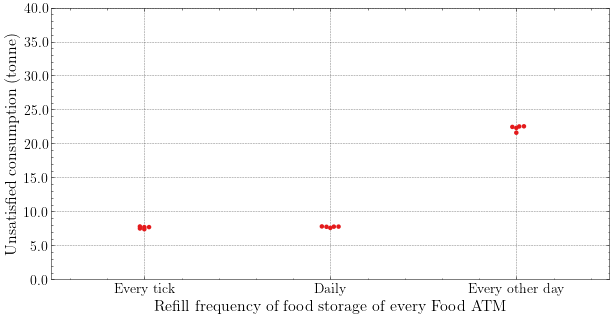

In [97]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

# relevant_indices = [0,1,2,3,4]
# relevant_scenarios = scenarios[ relevant_indices ]

# # Modify DF for plot
# storage_dict = {}
# for s in range(len(relevant_scenarios)):
#     tmp = input_vars_filtered
    
#     for f in range(len(factor_names)):
#         tmp = tmp[ tmp[factor_names[f]] == relevant_scenarios[s][f] ]
        
#     tmp = pd.concat([tmp.reset_index(),pd.DataFrame({"scenario":np.ones(len(tmp))*s})],axis=1)
#     storage_dict[s] = tmp
    
# # Join dfs from dictionary 
# tmp = pd.concat(storage_dict.values())
# tmp = tmp[ np.invert( [all(t) for t in zip(tmp.capacity_policy!=0, tmp.rerouting_policy!=0)]) ]

sns.swarmplot(ax=ax ,x='facrf',hue='variation', y="unsatisfied consumption", data=input_vars_filtered,size=4.5,palette="Set1")

# x-axis
ax.set_xlabel("Refill frequency of food storage of every Food ATM",fontsize=16)
xticklabels = ["Every tick","Daily","Every other day"]
ax.set_xticklabels(xticklabels,fontsize=14)

# y-axis
ax.set_ylim([0,40e3])
ax.set_yticklabels(np.linspace(0,40,9),fontsize=14)
ax.set_ylabel("Unsatisfied consumption (tonne)",fontsize=16)

# grid
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
ax.get_legend().remove()

# handles = ax.get_legend_handles_labels()[0]
# labels = ["No policy","Active Q mngmnt","Undirected rerouting","Directed rerouting","nana"]
# ax.legend(handles[:4],labels,loc='upper left',fontsize=14,bbox_to_anchor=(0.92, 1.05),framealpha=0.75);



<AxesSubplot:>

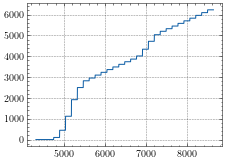

In [79]:
data.o1[data.o0==1].plot()

<AxesSubplot:>

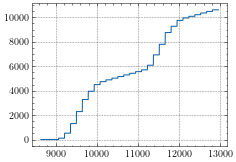

In [49]:
data.o1[data.o0==2].plot()